<a href="https://colab.research.google.com/github/PyBeginner1/LoanStatusPrediction/blob/main/LoanStatusPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [195]:
loan = pd.read_csv('/content/Loan.csv')

In [196]:
loan.shape

(614, 13)

In [197]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Check for null values


In [198]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Null/Missing Values 

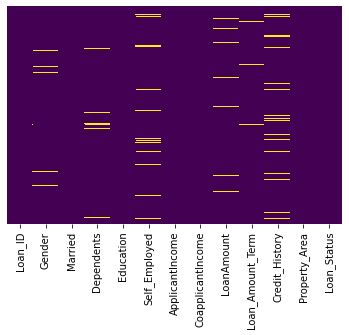

In [199]:
sns.heatmap(loan.isnull(), cbar = False, yticklabels = False, cmap = 'viridis')

Statistical info

In [200]:
loan.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Drop the missing values

In [201]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [202]:
#dropna = dropnotavailabale which means drop the null values
loan = loan.dropna()

In [203]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [204]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [205]:
loan.shape

(480, 13)

In [206]:
loan['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

Label Encoding.

1 ---> Yes

0 ---> No

In [207]:
loan.replace({"Loan_Status": {'N': 0, 'Y': 1}},inplace = True)

In [208]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


Dependents Column


In [209]:
loan['Dependents'].value_counts()


0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [210]:
#replacing 3+ with 4
loan.replace({"Dependents":{"3+" : 4}}, inplace =True)

In [211]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


In [212]:
loan['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

Education & Loan Status

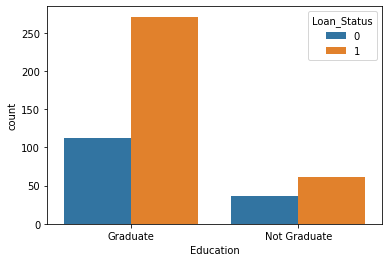

In [213]:
sns.countplot(x = 'Education' , hue ='Loan_Status', data =loan)

Married & Loan Status

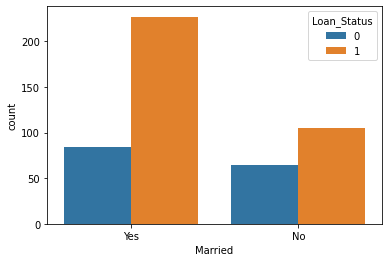

In [214]:
sns.countplot(x = "Married", hue ="Loan_Status", data = loan)

Dependents & Loan Status

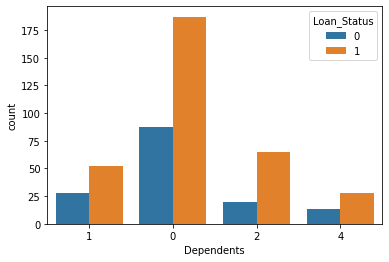

In [215]:
sns.countplot(x='Dependents', hue= 'Loan_Status', data =loan)

Area

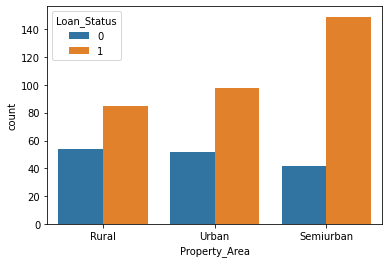

In [216]:
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', data = loan)

Gender

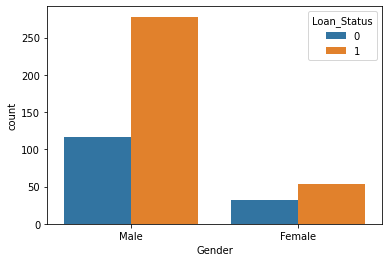

In [217]:
sns.countplot(x='Gender', hue = 'Loan_Status', data = loan)

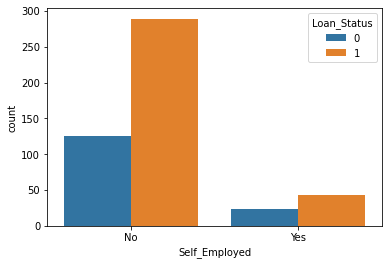

In [218]:
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = loan)

In [219]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


Convert Data into Textual data

In [220]:
loan.replace({'Married': {'No': 0, 'Yes': 1}, 'Education':{'Graduate':1, 'Not Graduate': 0}, 'Gender':{'Male' : 1, 'Female': 0}, 'Self_Employed':{ 'No': 0, 'Yes': 1}, 
              'Property_Area': {'Rural' : 0, 'Semiurban': 1, 'Urban': 2}}, inplace= True)


In [221]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [251]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


Split the Data & Label/Target

In [226]:
X = loan.drop(columns = ['Loan_Status', 'Loan_ID'], axis = 1)
Y = loan['Loan_Status']

In [227]:
print(X)
print(Y)

     Gender  Married  ... Credit_History  Property_Area
1         1        1  ...            1.0              0
2         1        1  ...            1.0              2
3         1        1  ...            1.0              2
4         1        0  ...            1.0              2
5         1        1  ...            1.0              2
..      ...      ...  ...            ...            ...
609       0        0  ...            1.0              0
610       1        1  ...            1.0              0
611       1        1  ...            1.0              2
612       1        1  ...            1.0              2
613       0        0  ...            0.0              1

[480 rows x 11 columns]
1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Splitting data into Train & Test data

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1,stratify = Y, random_state = 2)

In [230]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Model

In [234]:
model = svm.SVC(kernel = 'linear')

Training our model

In [235]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predicting

In [240]:
train_loan_prediction = model.predict(X_train)
score = accuracy_score(Y_train, train_loan_prediction)
print("Accuracy of training model is" ,score)

Accuracy of training model is 0.7986111111111112


Predicting the accuracy of testing model

In [239]:
test_loan_prediction = model.predict(X_test)
score_1 = accuracy_score(Y_test, test_loan_prediction)
print("Accuracy of testing model is" ,score_1)

Accuracy of testing model is 0.8333333333333334


Make a predictive system

In [244]:
input_data = (1,	1,	0,	1,	1,	3000,	0.0,	66.0,	360.0,	1.0,	2)

#convert to numpy array
input_data_numpy = np.asarray(input_data)

#reshape
input_data_reshape = input_data_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshape)



In [246]:
if prediction == 1:
  print('Loan is Approved')
else:
  print('Loan is not Approved')

Loan is Approved


Testing for Loan_Status = No





In [253]:
input_data = (0, 0, 0, 1, 1, 4583, 0.0, 133.0, 360.0, 0.0, 1)

#convert to numpy array
input_data_numpy = np.asarray(input_data)

#reshape
input_data_reshape = input_data_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshape)

In [254]:
if prediction == 1:
  print('Loan is Approved')
else:
  print('Loan is not Approved')

Loan is not Approved
